In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db= mysql.connector.connect(host="localhost",username="root",password="sameer@123khan",database="ecommerce")
cur=db.cursor()


# 1. List all unique cities where customers are located. 

In [35]:
query="""select distinct customer_city from customers"""
cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["unique cities"])
df

,unique cities
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# 2. Count the number of orders placed in 2017.

In [14]:
query="""select count(order_id) from orders where  year(order_purchase_timestamp)=2017"""
cur.execute(query)
data=cur.fetchall()
"total order placed in 2017 are=",data[0][0]

('total order placed in 2017 are=', 90202)

# 3. Find the total sales per category.

In [19]:
query="""select products.product_category category,
round(sum(payments.payment_value),2) sales 
from products join order_items
on products.product_id=order_items.product_id  
join payments 
on payments.order_id=order_items.order_id 
group by category"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["category","sales"])
df

,category,sales
0,perfumery,4053909.28
1,Furniture Decoration,11441411.13
2,telephony,3895056.41
3,bed table bath,13700429.37
4,automotive,6818354.65
...,...,...
69,cds music dvds,9595.44
70,La Cuisine,23308.24
71,Fashion Children's Clothing,6285.36
72,PC Gamer,17395.44


# 4. Calculate the percentage of orders that were paid in installments.

In [21]:
query="""select (sum(case when payment_installments >1 then 1 else 0 end)) /count(*)*100 from payments; """
cur.execute(query)
data=cur.fetchall()
"percentage of order in paid in installments is=",data

('percentage of order in paid in installments is=', [(Decimal('49.4176'),)])

# 5. Count the number of customers from each state and show in charts. 

   states  total no count
0      SP           83492
4      RJ           25704
2      MG           23270
5      RS           10932
3      PR           10090
1      SC            7274
9      BA            6760
13     DF            4280
8      ES            4066
7      GO            4040
15     PE            3304
12     CE            2672
6      PA            1950
16     MT            1814
10     MA            1494
11     MS            1430
21     PB            1072
23     PI             990
14     RN             970
19     AL             826
25     SE             700
22     TO             560
20     RO             506
17     AM             296
24     AC             162
18     AP             136
26     RR              92


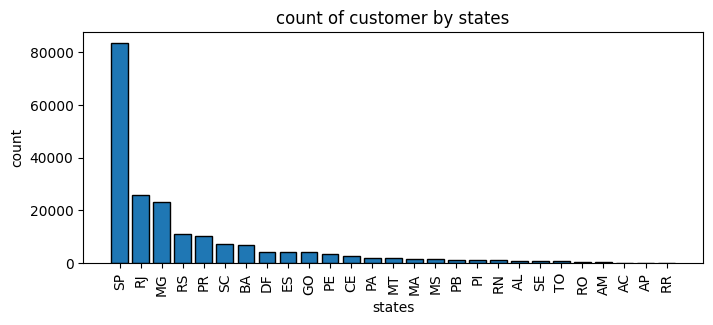

In [57]:
query="""select customer_state,count(*) from customers group by customer_state"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["states","total no count"])
df=df.sort_values(by="total no count",ascending=False)
print(df)
plt.figure(figsize=(8,3))
plt.bar(df["states"],df["total no count"],edgecolor="black")
plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("count")
plt.title("count of customer by states")
plt.show()

# 6. Calculate the number of orders per month in 2018 show chart .

      months  count
0       July  12584
1     August  13024
2   February  13456
3       June  12334
4      March  14422
5    January  14538
6        May  13746
7      April  13878
8  September     32
9    October      8


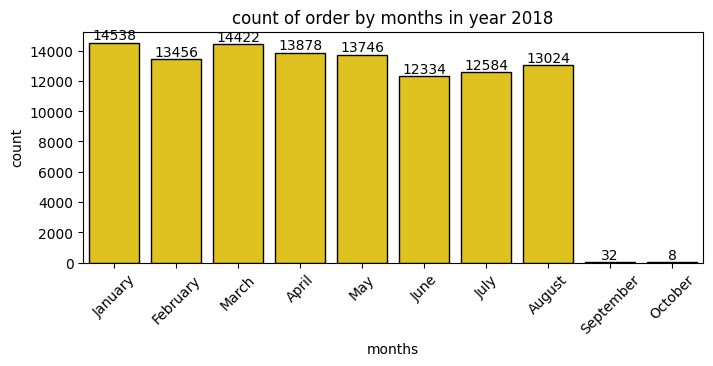

In [64]:
query="""select monthname(order_purchase_timestamp) months ,count(*)  total_count from orders where year(order_purchase_timestamp)=2018 group by months """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["months","count"])
print(df)
o=["January","February","March","April","May","June","July","August","September","October"]

plt.figure(figsize=(8,3))
ax=sns.barplot(x=df["months"],y=df["count"],data=df,order=o,edgecolor="black",color="gold")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("count of order by months in year 2018")
plt.show()

# 7. Find the average number of products per order, grouped by customer city.

In [77]:
query="""with count_per_order as (select orders.order_id,orders.customer_id,count(order_items.order_id)as oc from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city,avg(count_per_order.oc) average
from customers join count_per_order 
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city order by average"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["cities","average"])
df

,cities,average
0,ulianopolis,4.0000
1,adustina,4.0000
2,abatia,4.0000
3,pontalinda,4.0000
4,capitao andrade,4.0000
...,...,...
4105,matias olimpio,20.0000
4106,candido godoi,24.0000
4107,datas,24.0000
4108,celso ramos,26.0000


# 8. Calculate the percentage of total revenue contributed by each product category.

In [82]:
query="""select products.product_category category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2)sales 
from products join order_items
on products.product_id=order_items.product_id  
join payments 
on payments.order_id=order_items.order_id 
group by category order by sales desc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["category","sales%"])
df.head()

,category,sales%
0,bed table bath,42.79
1,HEALTH BEAUTY,41.41
2,computer accessories,39.61
3,Furniture Decoration,35.73
4,Watches present,35.71


# 9. Identify the correlation between product price and the number of times a product has been purchased.

In [87]:
query="""select products.product_category,count(order_items.product_id),round(avg(order_items.price),2)from 
products join order_items on products.product_id=order_items.product_id
group by products.product_category """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["category","order_count","price"])


arr1=df["order_count"]
arr2=df["price"]

a=np.corrcoef([arr1,arr2])
print("the correlation between price and number of times a product has been purchased is=",a[0][1])

the correlation between price and number of times a product has been purchased is= -0.10631514167157562


# 10. Calculate the total revenue generated by each seller, and rank them by revenue and chart of top 10.


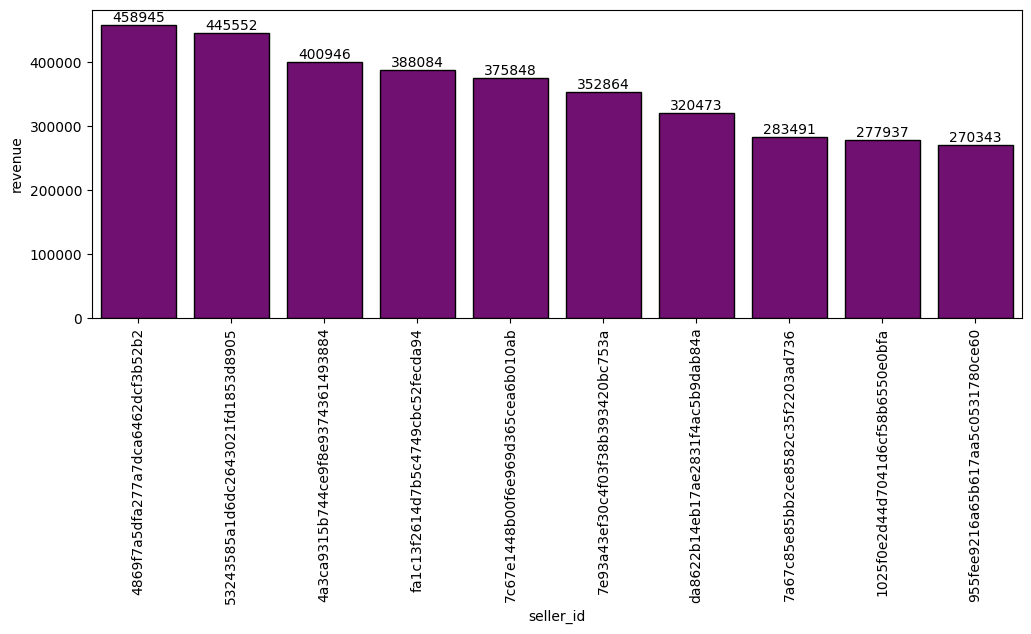

In [119]:
query="""select *,dense_rank() over(order by revenue desc) as rn from
(select seller_id,round(sum(price),2) as revenue from order_items group by seller_id) as a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["seller_id","revenue","rank"])
df=df.head(10)

plt.figure(figsize=(12,4))
plt.xticks(rotation=90)

ax=sns.barplot(x="seller_id",y="revenue",data=df,edgecolor="black",color="purple")
ax.bar_label(ax.containers[0])
plt.show()


# 11. Calculate the year-over-year growth rate of total sales.

In [132]:
query="""with a as(select year(orders.order_purchase_timestamp) as years,round(sum(payments.payment_value),2) as payment from orders 
join payments on orders.order_id=payments.order_id
group by years order by years)

select years,((payment-lag(payment,1) over(order by years))/lag(payment,1) over(order by years)) * 100  from a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["years","growth_%"])
df

,years,growth_%
0,2016,NaN
1,2017,12112.703757
2,2018,20.000924


# 12. Identify the top 3 customers who spent the most money in each year and show chart.

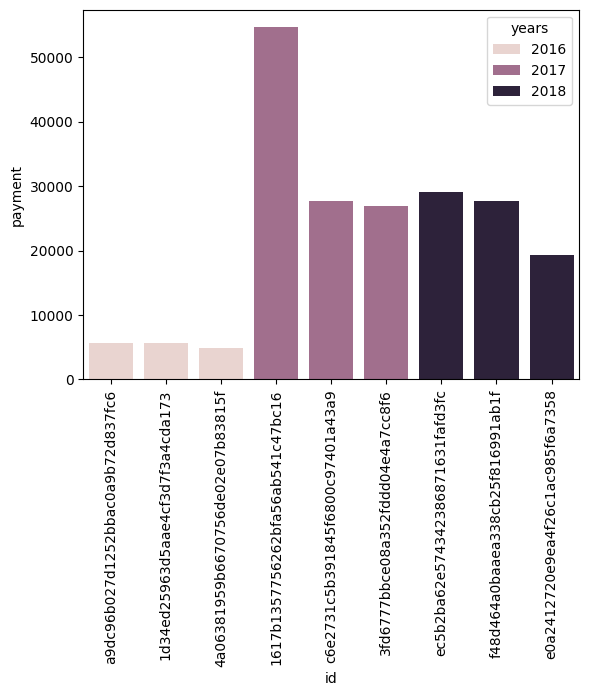

In [140]:
query=""" select years,customer_id,payment,d_rank from 
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value)desc)  d_rank from orders
join payments on payments.order_id=orders.order_id
group by year(orders.order_purchase_timestamp),orders.customer_id)
as a where d_rank<=3"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["years","id","payment","rank"])
sns.barplot(x="id",y="payment",data=df,hue="years")
plt.xticks(rotation=90)
plt.show()